In [1]:
import os
import mujoco
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv, VecMonitor, DummyVecEnv, VecNormalize
from stable_baselines3.common.monitor import Monitor, load_results
import matplotlib.pyplot as plt
from src import render_model_gym
from datetime import datetime
import importlib
from src import render_model_gym


from src.definitions import PROJECT_ROOT, enforce_absolute_path
from src import helpers
import src.lucy_classes_v1 as lucy
from src.helpers import generate_paths_monitor_model

importlib.reload(lucy)

<module 'src.lucy_classes_v1' from 'c:\\GitHub\\training-lucy\\src\\lucy_classes_v1.py'>

In [2]:
# Configuration
n_envs = 7
xml_path = enforce_absolute_path("animals/lucy_v3.xml")



def new_vec_env(env: lucy.LucyEnv, monitor_dir: str):
    return make_vec_env(
        env,
        n_envs=n_envs,
        vec_env_cls=SubprocVecEnv,
        monitor_dir=monitor_dir,
    )
    


print(f"MuJoCo version: {mujoco.__version__}")

# Verify Lucy model loads
model = mujoco.MjModel.from_xml_path(xml_path)
data = mujoco.MjData(model)
print(
    f"Lucy model loaded: {model.nq} qpos dims, {model.nv} qvel dims, {model.nu} actuators"
)
print(f"Observation space will be: {model.nq - 2 + model.nv} dims (qpos[2:] + qvel)")

sim_start_time = datetime.now().strftime("%Y-%m-%d_%H-%M")




MuJoCo version: 3.4.0
Lucy model loaded: 57 qpos dims, 48 qvel dims, 42 actuators
Observation space will be: 103 dims (qpos[2:] + qvel)


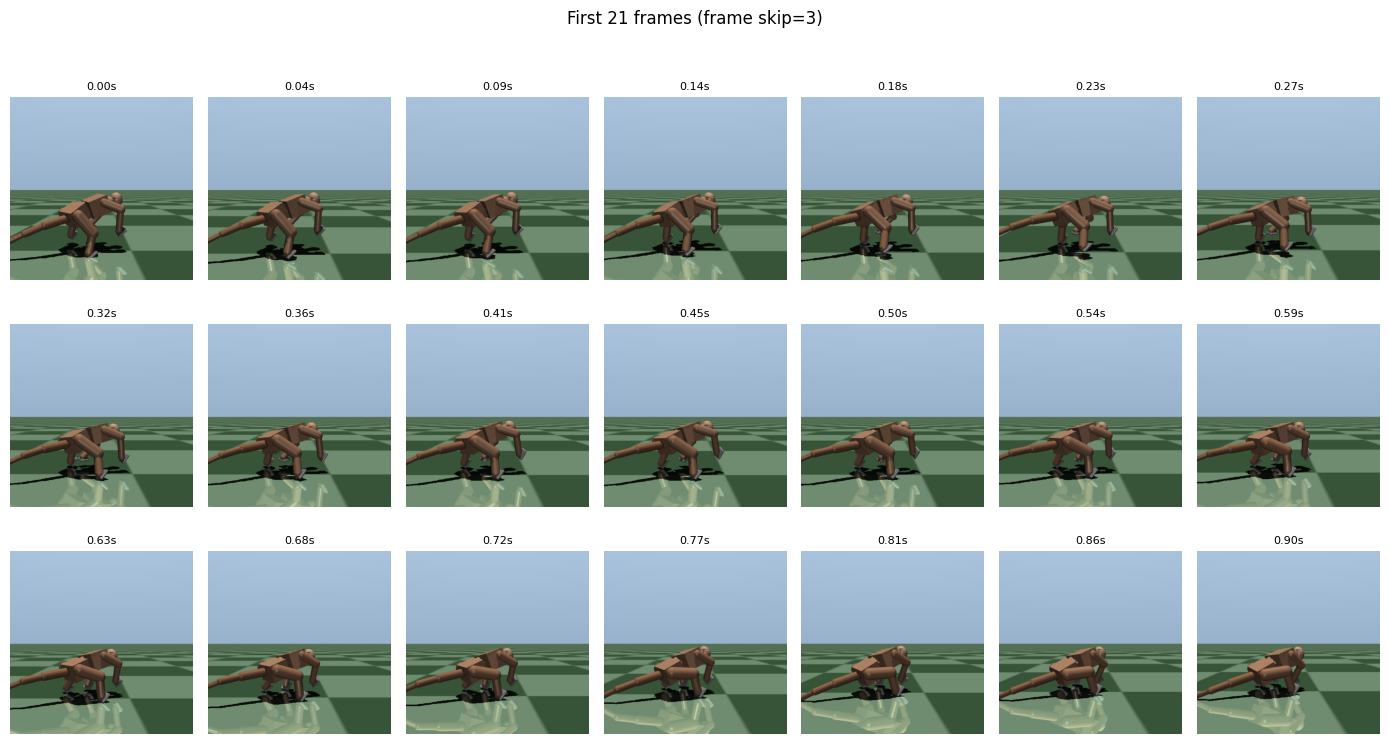

,time,reward,forward_velocity,chest_height,ctrl_cost,x_position,max_episode_seconds,sensors,height_dict,total_height_reward,...,head_direction_reward,head_direction_angle,leg_pos_reward,leg_pos_details,straight_tail_reward,straight_tail_details,body_contacts,contact_penalty,fall_penalty,cum_reward
0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.045,2.718956,-0.082634,0.210070,0.003515,-0.161475,10.0,{},"{'chest': {'height': 0.21007003380135766, 'rew...",7.000001e-01,...,0.0,27.199562,0.523141,"{'front_left': {'thigh': 0.700888603867671, 's...",0.008681,"{'straight_score': 0.9772639559220252, 'actuat...",0.0,0.0,0.0,3.834143
2,0.090,2.693280,-0.081436,0.203318,0.003340,-0.165015,10.0,{},"{'chest': {'height': 0.20331773132522063, 'rew...",7.000000e-01,...,0.0,28.104703,0.515863,"{'front_left': {'thigh': 0.6955005612402935, '...",-0.032473,"{'straight_score': 0.9785761610999131, 'actuat...",0.0,0.0,0.0,11.832885
3,0.135,-0.166659,-0.205691,0.189694,0.003526,-0.172097,10.0,{},"{'chest': {'height': 0.18969426704754108, 'rew...",2.340858e-05,...,0.0,30.219631,0.508126,"{'front_left': {'thigh': 0.7201395845724063, '...",-0.117482,"{'straight_score': 0.9807050125092333, 'actuat...",1.0,-2.0,0.0,9.450695
4,0.180,1.890191,-0.013476,0.190023,0.003009,-0.173693,10.0,{},"{'chest': {'height': 0.19002275265315477, 'rew...",3.251132e-05,...,0.0,30.579087,0.506113,"{'front_left': {'thigh': 0.7808999177131021, '...",-0.101307,"{'straight_score': 0.9831496524302482, 'actuat...",0.0,0.0,0.0,11.140946
5,0.225,-0.053215,0.024416,0.186031,0.003682,-0.173284,10.0,{},"{'chest': {'height': 0.18603075464588997, 'rew...",6.002496e-07,...,0.0,32.599075,0.499742,"{'front_left': {'thigh': 0.8150662879892216, '...",-0.051507,"{'straight_score': 0.9857357671720235, 'actuat...",1.0,-2.0,0.0,10.992752
6,0.270,-0.183498,0.042874,0.178554,0.003538,-0.171919,10.0,{},"{'chest': {'height': 0.17855394114924214, 'rew...",3.397763e-10,...,0.0,36.685638,0.489675,"{'front_left': {'thigh': 0.8354402349499533, '...",-0.153046,"{'straight_score': 0.9887987399784994, 'actuat...",1.0,-2.0,0.0,10.556353
7,0.315,-0.104291,0.109685,0.169006,0.004123,-0.166552,10.0,{},"{'chest': {'height': 0.16900612120825426, 'rew...",2.424530e-14,...,0.0,40.137474,0.480050,"{'front_left': {'thigh': 0.8291775992783071, '...",-0.114636,"{'straight_score': 0.9912788089053671, 'actuat...",1.0,-2.0,0.0,10.354757
8,0.360,-0.144234,0.068440,0.173106,0.004331,-0.165589,10.0,{},"{'chest': {'height': 0.17310565945650838, 'rew...",1.462293e-12,...,0.0,39.279824,0.478633,"{'front_left': {'thigh': 0.7941375159628952, '...",-0.095825,"{'straight_score': 0.9924628693786637, 'actuat...",1.0,-2.0,0.0,10.005860
9,0.405,-0.004764,0.056602,0.179856,0.003615,-0.162318,10.0,{},"{'chest': {'height': 0.1798555581209464, 'rewa...",1.248757e-09,...,0.0,38.156393,0.475899,"{'front_left': {'thigh': 0.7441852489143175, '...",-0.032230,"{'straight_score': 0.9948204372084487, 'actuat...",1.0,-2.0,0.0,11.870920


In [3]:
importlib.reload(lucy)
importlib.reload(render_model_gym)

standing_monitor_path, standing_model_path = generate_paths_monitor_model(
    "standing_model"
)


def make_env(render_mode="None", *args, **kwargs):
    
    return lucy.LucyStandingWrapper(
        lucy.LucyEnv(
            xml_file=xml_path, render_mode=render_mode, max_episode_seconds=10,
        
        ),
            body_contact_penalty=-2
    )

standing_attrs = [
    "chest_height",
    "forward_velocity",
    "total_height_reward",
    "head_direction_reward",
    "leg_pos_reward",
    "straight_tail_reward",
]

env = make_env(render_mode="rgb_array")

df = render_model_gym.display_test_env(
    env,
    max_frames=21,
    frame_skip=3,
    attr_keys='all',
)
plt.show()
df

In [4]:
standing_vec_env = VecNormalize(new_vec_env(make_env, standing_monitor_path))

print(f"Created {n_envs} parallel standing environments")
print(f"Logging to: {standing_monitor_path}")

standing_model = PPO(
    policy="MlpPolicy",
    env=standing_vec_env,
    verbose=1,
    device="cpu",
    n_steps=2048,
    batch_size=256,
    n_epochs=4,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.02,
    learning_rate=2e-4,
    target_kl=0.03,
    policy_kwargs=dict(
        net_arch=dict(
            pi=[512, 512, 256], vf=[512, 512, 256]
        )
    ),
)

# Train for standing (shorter since simpler task)
STANDING_TIMESTEPS = 2_000_000
print(f"Training standing policy for {STANDING_TIMESTEPS:,} timesteps...")
standing_model.learn(total_timesteps=STANDING_TIMESTEPS)

Created 7 parallel standing environments
Logging to: C:\GitHub\training-lucy\logs\standing_model_2026-01-12_02-39
Using cpu device
Training standing policy for 2,000,000 timesteps...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 54.8     |
|    ep_rew_mean     | -48.2    |
| time/              |          |
|    fps             | 2426     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 14336    |
---------------------------------
Early stopping at step 3 due to reaching max kl: 0.05
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 67.2       |
|    ep_rew_mean          | -54.8      |
| time/                   |            |
|    fps                  | 2041       |
|    iterations           | 2          |
|    time_elapsed         | 14         |
|    total_timesteps      | 28672      |
| train/                  |            |
|    approx_k

Stable standing model at: Standing model saved to: `C:\GitHub\training-lucy\trained_models\lucy_v2_standing_model_2026-01-11_09-04`

In [5]:

standing_model.save(standing_model_path)
print(f"Standing model saved to: {standing_model_path}")

Standing model saved to: C:\GitHub\training-lucy\trained_models\standing_model_2026-01-12_02-39


In [ ]:
render_model_gym.render_model_gym(standing_model_path, xml_path)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Simulation dt: 0.0150s per step
Running simulation at 1.0x speed... Close the window to exit.


c:\GitHub\training-lucy\.venv\Lib\site-packages\glfw\__init__.py:917: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


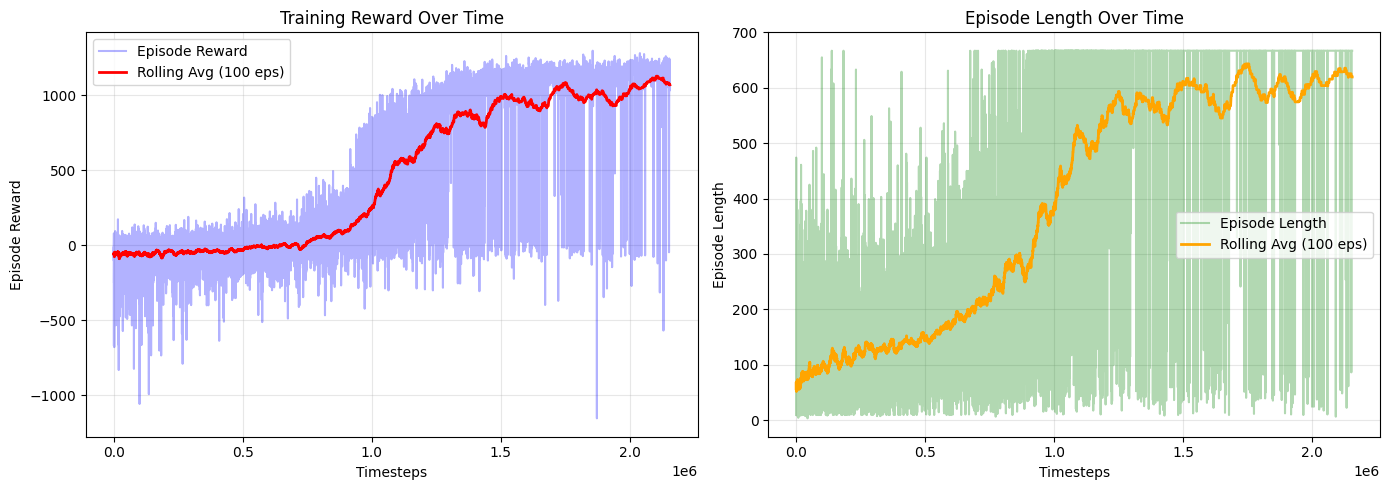

Training Summary:
Total episodes: 8837
Final avg reward (last 100 eps): 1070.06
Max reward: 1297.61
  Final avg length (last 100 eps): 619.6


In [ ]:
standing_df = load_results(standing_monitor_path)
helpers.plot_training_progress(standing_df)
helpers.print_training_summary(standing_df)

# Walking training

Load stable standing model

In [ ]:
#standing_model_path = "C:\\GitHub\\training-lucy\\trained_models\\lucy_v2_standing_model_2026-01-11_09-04"

<>:6: SyntaxWarning: invalid escape sequence '\G'
<>:6: SyntaxWarning: invalid escape sequence '\G'
C:\Users\326po\AppData\Local\Temp\ipykernel_11516\2893037196.py:6: SyntaxWarning: invalid escape sequence '\G'
  standing_model_path = "C:\GitHub\training-lucy\trained_models\lucy_v2_standing_model_2026-01-11_09-04"


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


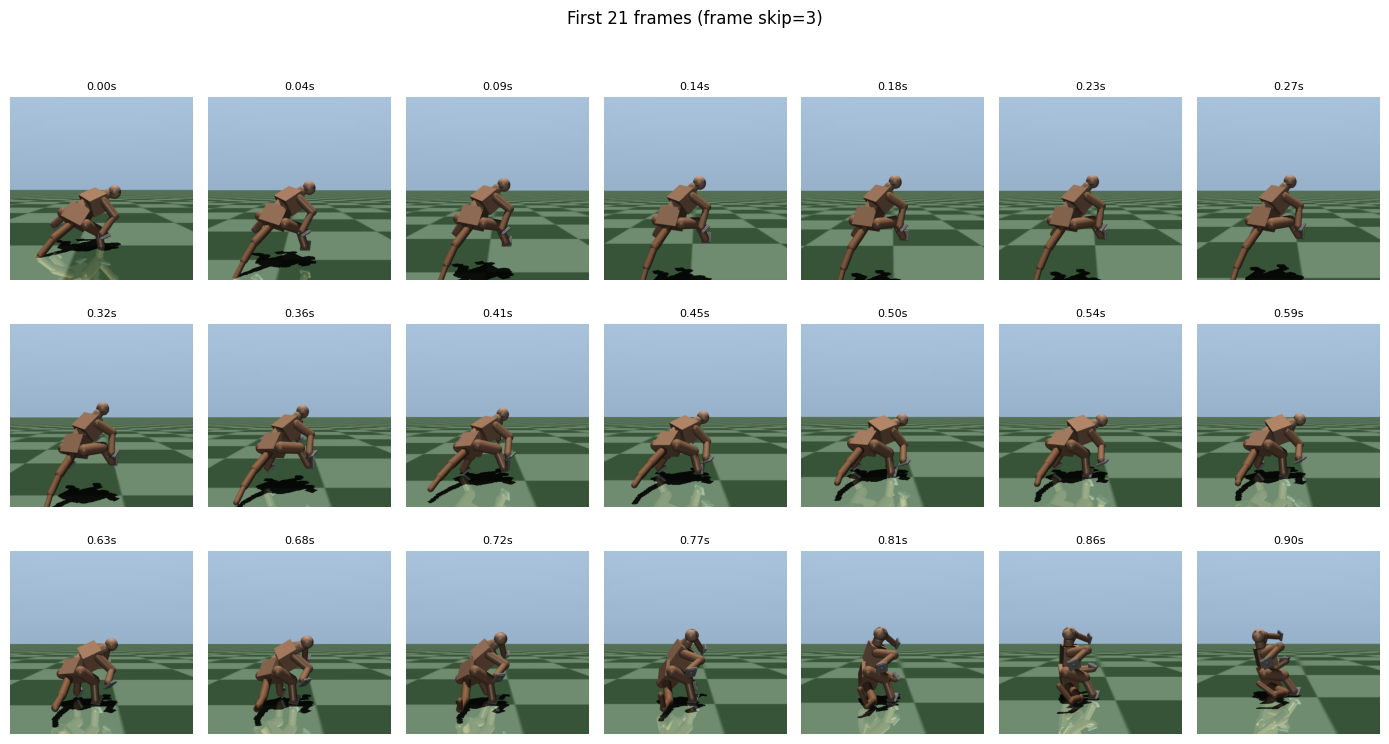

,time,chest_height,forward_velocity,forward_reward,gait_reward,stillness_reward,leg_pos_reward,height_dict,reward,cum_reward
0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,0.045,0.271852,-0.870251,-0.863448,0.0,-0.000606,0.055514,"{'chest': {'height': 0.2718517509357837, 'rewa...",-0.256873,-1.531174
2,0.090,0.331715,-0.801591,-0.789655,0.0,-0.006266,0.053487,"{'chest': {'height': 0.33171527306501225, 'rew...",-0.006192,-1.802373
3,0.135,0.369301,-0.733299,-0.724056,0.0,-0.019404,0.051161,"{'chest': {'height': 0.36930143687231715, 'rew...",0.060244,-1.686241
4,0.180,0.385291,-0.667405,-0.661340,0.0,-0.086662,0.048909,"{'chest': {'height': 0.3852913500732132, 'rewa...",0.107588,-1.412043
5,0.225,0.380273,-0.637086,-0.634110,0.0,-0.114661,0.047354,"{'chest': {'height': 0.3802727848502047, 'rewa...",0.117630,-1.059981
6,0.270,0.355236,-0.652808,-0.654987,0.0,-0.061899,0.045647,"{'chest': {'height': 0.3552364616350506, 'rewa...",0.105426,-0.732860
7,0.315,0.310632,-0.671815,-0.676923,0.0,-0.024613,0.044084,"{'chest': {'height': 0.3106315940268092, 'rewa...",0.093712,-0.438472
8,0.360,0.264417,-0.269122,-0.274498,0.0,-0.000963,0.046990,"{'chest': {'height': 0.26441654075085125, 'rew...",0.445817,0.768951
9,0.405,0.222528,0.296546,0.405645,0.0,-0.002295,0.049893,"{'chest': {'height': 0.22252819654377512, 'rew...",0.932774,2.669489


In [ ]:
# Create walking training environment
importlib.reload(lucy)

if "standing_model_path" not in locals():
    print("Loading pre-trained standing model...")
    standing_model_path = "C:\GitHub\training-lucy\trained_models\lucy_v2_standing_model_2026-01-11_09-04"




walking_attrKeys = [
    "chest_height",
    "forward_velocity",
    "forward_reward",
    "gait_reward",
    "stillness_reward",
    "leg_pos_reward",
    "height_dict"
]


walking_log_dir, walking_model_path = generate_paths_monitor_model(
    "walking_model"
)


def make_walking_env(render_mode="None"):
    """Factory function for walking environment."""
    env = lucy.LucyEnv(
        xml_file=xml_path,
        render_mode=render_mode,
        max_episode_seconds=30,
    )
    env = lucy.LucyWalkingWrapper(
        env,
        forward_weight=1,
        fall_threshold=[0.14, 30],
        fall_penalty=-200,
        gait_weight=1,
        body_contact_penalty=-2.0,
        standing_reward_discount_factor=0.1,
    )


    return env


env = make_walking_env(render_mode="rgb_array")
model = PPO.load(standing_model_path, env=env)

# attach env so model.predict works
df = render_model_gym.display_test_env(
    env,
    max_frames=21,
    frame_skip=3,
    attr_keys=walking_attrKeys,
    model=model,
)
plt.show()
df

In [ ]:
walking_vec_env = new_vec_env(make_walking_env, walking_log_dir)
print(f"Loading from standing model at: {standing_model_path}")


walking_log_path, walking_model_path = generate_paths_monitor_model(
    f"walking_model"
)

walking_model = PPO.load(standing_model_path, env=walking_vec_env)

walking_model.set_env(walking_vec_env)

walking_model.learn(total_timesteps=3_000_000)

Loading from standing model at: C:\GitHub\training-lucy\trained_models\standing_model_2026-01-12_01-23
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 51.7     |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    fps             | 2256     |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 14336    |
---------------------------------
Early stopping at step 0 due to reaching max kl: 0.05
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 84.2        |
|    ep_rew_mean          | 30.3        |
| time/                   |             |
|    fps                  | 2222        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.020700835 |
|    clip_fraction        | 0.259       |

In [ ]:
walking_model.save(walking_model_path)
walking_df = load_results(walking_log_dir)

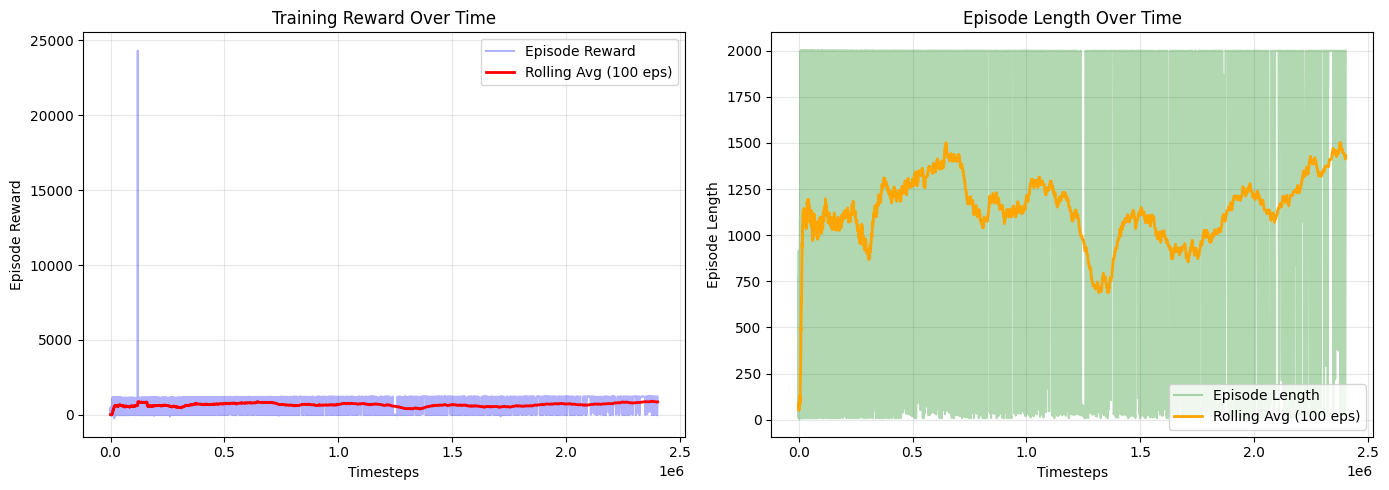

Training Summary:
Total episodes: 3241
Final avg reward (last 100 eps): 867.36
Max reward: 24311.14
  Final avg length (last 100 eps): 1431.8


In [ ]:
walking_df = load_results(walking_log_dir)
importlib.reload(helpers)
helpers.plot_training_progress(walking_df)
helpers.print_training_summary(walking_df)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode terminated during frame collection.


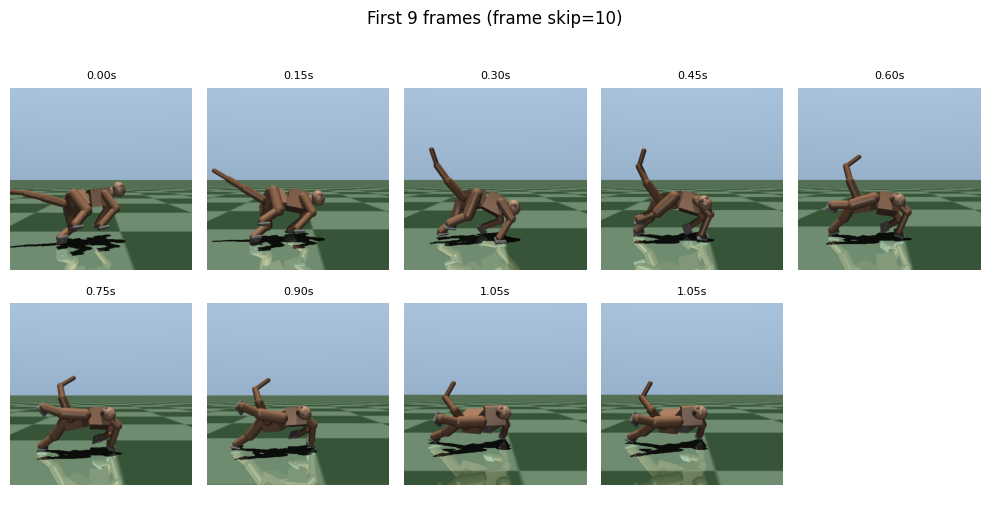

,time,chest_height,forward_velocity,forward_reward,gait_reward,stillness_reward,leg_pos_reward,height_dict,reward,cum_reward
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,0.15,0.168419,0.277754,0.284699,0.0,-0.040462,0.064100,"{'chest': {'height': 0.1684191088206776, 'rewa...",0.920754,6.704923
2,0.30,0.151183,0.168819,0.115929,0.0,-0.030495,0.066469,"{'chest': {'height': 0.15118313579441017, 'rew...",0.533048,14.330508
3,0.45,0.152509,-0.136659,-0.020169,0.0,-0.085312,0.064675,"{'chest': {'height': 0.15250858159934147, 'rew...",0.392383,17.236568
4,0.60,0.148804,0.038770,0.030338,0.0,-0.088856,0.053715,"{'chest': {'height': 0.14880398998262487, 'rew...",0.664938,23.857193
5,0.75,0.151852,-0.044049,-0.022459,0.0,-0.176540,0.048273,"{'chest': {'height': 0.15185199548034717, 'rew...",0.392634,28.800777
6,0.90,0.153075,-0.035454,-0.011735,0.0,-0.060823,0.045004,"{'chest': {'height': 0.15307465494063208, 'rew...",0.609902,32.723638
7,1.05,0.139564,0.107524,0.120252,0.0,-0.003114,0.037719,"{'chest': {'height': 0.13956382810152484, 'rew...",-19.255940,18.804268
8,1.05,0.139564,0.107524,0.120252,0.0,-0.003114,0.037719,"{'chest': {'height': 0.13956382810152484, 'rew...",-19.255940,18.804268


In [ ]:
model = PPO.load(walking_model_path, env=make_walking_env())
importlib.reload(render_model_gym)
df = render_model_gym.display_test_env(
    make_walking_env(render_mode="rgb_array"),
    max_frames=21,
    frame_skip=10,
    attr_keys=walking_attrKeys + ["leg_pos_reward"],
    model=model,
)
plt.show()
display(df)

In [ ]:
render_model_gym.render_model_gym(walking_model_path, xml_path)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Simulation dt: 0.0150s per step
Running simulation at 1.0x speed... Close the window to exit.


c:\GitHub\training-lucy\.venv\Lib\site-packages\glfw\__init__.py:917: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)



Stopped by user
